'''
Mô hình hồi quy tuyến tính: LinearRegression(Dự đoán được các giá trị liên tục)
Input: biến độc lập ví dụ: Ex và test score
Output: biến phụ thuộc  ví dụ: salary
1. Hồi quy --> đầu ra là số thực
- Biến số là cột
- Input là trọng lượng và dung tích: V và W
- Out là CO2
- Model là mô hình hồi quy tuyến tính

Bước 1: Load data
Bước 2: EDA
Bước 3: Chia data thành tập train và tập test
Bước 4: Xây dựng mô hình hồi quy tuyến tính
Note: Bước 4 df chia ra 
+ Train: 80%
+ Test: 20%
- Hệ số random_state = 146 tức là sinh ra các giá trị ngẫu nhiên từ df sẽ giống với Thầy, đi thi sẽ được cung cấp 
hệ số này

+ X-train là input của trập train
+ X_test là input cua tập test
+ y_train là output của tập train
+ y_test là output của tập test
Bước 5: Xác định giá trị này tương đương với gì?
Bước 7: coef tương ứng với A1 và A2 
        intercept ứng với A0
Ghi ra giấy: CO2 = 76,189 + 0.0115 * val + 0.006 * Wei

Đánh giá mô hình: sử dụng độ đo để đánh giá
+ Dùng excel
CO2 = mô hình ghi ra giấy thay đổi cột V, W vào là được
+ Đánh gia mô hình: so sánh thực tế và dự báo
Cột độ lệch (xài abs trị tuyệt đối)= thực tế - dự báo
--> Độ lệch càng nhỏ thì càng tốt (không phân biệt âm dương)

Tính trung bình = 5.27 --> nói lên cứ mỗi một giá trị dự báo được thì lệch khoảng 5.27 so với thực tế

Ví dụ: dung tích 3500 và p = 2500 --> chưa có số liệu CO2
Dự báo CO2 = cách tính tb cột dự báo = 128.66
2. Phân loại --> đầu ra là data định danh
'''

'''    
    Install các thư viên:
    1. pip install pandas
    2. pip install sklearn
    3. pip install statsmodels

    Dữ liệu đọc là dữ liệu về xe hơi
    
'''

#Step 1: Load data



In [3]:
import pandas as pd 

df = pd.read_csv('cars_data.csv')# đổi cái file csv mới vô đây
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [4]:
'''
    Step 2: Thực hiên EDA trên các biến số SINH VIÊN TỰ LÀM (TRONG LỚP THỰC HÀNH)
'''
#View the data

'\n    Step 2: Thực hiên EDA trên các biến số SINH VIÊN TỰ LÀM (TRONG LỚP THỰC HÀNH)\n'

In [5]:

#Describe the data
df_ford = df[df['Car'] == 'Ford']
print(df_ford)

     Car   Model  Volume  Weight  CO2
8   Ford  Fiesta    1500    1112   98
12  Ford  Fiesta    1000    1112   99
19  Ford   Focus    2000    1328  105
20  Ford  Mondeo    1600    1584   94
32  Ford   B-Max    1600    1235  104


In [6]:
df_ford.describe()

,Volume,Weight,CO2
count,5.000000,5.000000,5.000000
mean,1540.000000,1274.200000,100.000000
std,357.770876,195.591922,4.527693
min,1000.000000,1112.000000,94.000000
25%,1500.000000,1112.000000,98.000000
50%,1600.000000,1235.000000,99.000000
75%,1600.000000,1328.000000,104.000000
max,2000.000000,1584.000000,105.000000


In [7]:
#SORT
df_ford.sort_values(by=['Volume','Weight','CO2'], ascending=False)

# False: giảm dần
# True: tăng dân

,Car,Model,Volume,Weight,CO2
19,Ford,Focus,2000,1328,105
20,Ford,Mondeo,1600,1584,94
32,Ford,B-Max,1600,1235,104
8,Ford,Fiesta,1500,1112,98
12,Ford,Fiesta,1000,1112,99


In [8]:
#SORT
df_ford.sort_values(by=['Volume','Weight','CO2'], ascending=True)

,Car,Model,Volume,Weight,CO2
12,Ford,Fiesta,1000,1112,99
8,Ford,Fiesta,1500,1112,98
32,Ford,B-Max,1600,1235,104
20,Ford,Mondeo,1600,1584,94
19,Ford,Focus,2000,1328,105


<AxesSubplot:>

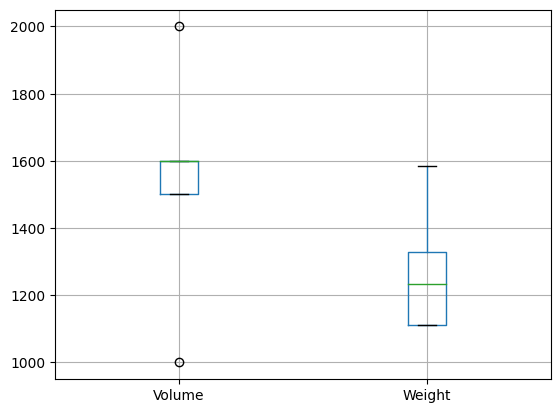

In [9]:
df_ford.boxplot(column=['Volume','Weight'])

In [10]:
#EDA 
# 1. Thay thế trường null thành trung bình của cột đó 

#Xem dữ liệu của trường nào bằng null
df_ford.isna().sum()


Car       0
Model     0
Volume    0
Weight    0
CO2       0
dtype: int64

In [11]:
# 2. Thay thế dữ liệu ngoại vi bằng trung bình
mean_Volumne = df_ford.mean()
df_ford.replace(df_ford['Volume'].min(), mean_Volumne, inplace=True)
df_ford.replace(df_ford['Volume'].max(), mean_Volumne, inplace=True)
# Nhận xét : 
'''
Dữ liệu của Volume có 2 giá trị ngoại vi
'''


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15304\141616506.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_Volumne = df_ford.mean()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15304\141616506.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ford.replace(df_ford['Volume'].min(), mean_Volumne, inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15304\141616506.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

'\nDữ liệu của Volume có 2 giá trị ngoại vi\n'

In [13]:
#Khảo sát tương quan:
df.corr()
#Nhận xét:


,Volume,Weight,CO2
Volume,1.000000,0.753537,0.592082
Weight,0.753537,1.000000,0.552150
CO2,0.592082,0.552150,1.000000


In [29]:
#Find the duplicates
# tìm dữ liệu trùng
df.duplicated().sum()
'''
Hệ số tương quan của Weight và Volume là 0.75 nên chúng có sự tương quan tuyến tính mạnh
Hệ số tương quan của CO2 và Volume là 0.59 nên chúng có sự tương quan tuyến tính 
Hệ số tương quan của Weight và CO2 là 0.55 nên chúng có sự tương quan tuyến tính 
'''

'\nHệ số tương quan của Weight và Volume là 0.75 nên chúng có sự tương quan tuyến tính mạnh\nHệ số tương quan của CO2 và Volume là 0.59 nên chúng có sự tương quan tuyến tính \nHệ số tương quan của Weight và CO2 là 0.55 nên chúng có sự tương quan tuyến tính \n'

In [15]:
#Xu ly xoa het dong du lieu rong
df.dropna(how = 'all', inplace = True)
#Đã được võ tấn đạt đóng gói

In [16]:
#Thay the cac cot du lieu thieu = Unkown
#df['...'].fillna('unknow', inplace = True)

In [17]:
'''
    Step 3: Tạo tập dữ liệu input và output từ dataset
'''
# Tập dữ liệu
# x: input(Biến độc lập)
# y: output(Biến phụ thuộc)

x = df[['Volume','Weight']].values
y = df[['CO2']].values

In [18]:
#chia tác ra tranning và testing theo tỉ kệ 80% và 20%
#Chia tách ra training và testing
#x_train là input tập train
#x_test là input tập test
#y_train là out của tập train
#y_test là out của tập test

'''
    Step 4: Chia tập dữ liệu thành 2 phần : training và testing theo tỉ lệ là 80% và 20%
    Chia tách ra training và testing
'''
from sklearn.model_selection import train_test_split# trai_test_split dùng để chia tập dữ liệu thành train data và test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state= 146)#testing là 20% và random_state theo yêu cầu đề bài

In [19]:
'''
    Step 5: Xây dựng mô hình hồi quy trong Marchine learning
    Xây dụng mô hình hồi quy tuyến tính đa biến
    VD: CO2  = A0 + A1*Volume + A2*Weight + Epsilon
'''
from sklearn import linear_model
model = linear_model.LinearRegression() 
model.fit(x_train, y_train)


LinearRegression()

In [20]:
# Step 6: Đánh giá mô hình( xác định các giá trị và đánh giá mô hình)
# Sinh viên xác định các giá trị này tương ứng với gì
# To retrieving the intercept
print(model.intercept_)# intercept ứng với A0
       
# To retrieving the slope(coefficient)
print(model.coef_)# coef tương ứng với A1 và A2

# Sinh viên ghi ra mô hình hồi quy mà máy tính tính được

# Mô hình hồi quy
# Ghi ra giấy 
print('CO2 = 76.18984304 + 0.01152742*Volume + 0.00606494*Weight')
# chia tập dữ liệu 2 phàn là training và testing theo tỉ lệ 80% 20%
# vì giảm thiểu khả năng sai lệch và thiên vị trong quá trình đánh giá mô hình

[76.18984304]
[[0.01152742 0.00606494]]
CO2 = 76.18984304 + 0.01152742*Volume + 0.00606494*Weight


In [21]:
'''
    Tính toán các MAE, MSE, RMSE trên tập dữ liệu test để đánh giá mô hình
    Sau đó đưa ra kết luận

    Nhận xét:
    -- MAE(độ lệch): càng nhỏ thì càng chính xác(Lỗi càng ít và ngc lại)
    nếu train, test lệch quá nhiều -> overfit( phải cân  bằng lại giá trị này 1 cái giảm 1 cái tăng)
    EX: học tốt nhưng không làm được 
    --> cứ mỗi giá trị dự báo thì lệch khoảng bao nhiêu so với thực tế

    -- MSE(kết quả thực tế): ccho biết sai số bình phương trung bình giữa các giá trị được 
    dự đoán và thực tế , đánh giá chất lượng của 1 dự đoán hay 1 ước lượng nào đó
        -MSE càng nhỏ(càng về 0) sai số càng ít ==> dự đoán có chất lượng, chính xác(để MSE càng ngày càng nhỏ ta chỉ cần lặp lại MSE nhiều lần)
    --> cho biết mỗi kết quả dự báo lệch bao nhiêu so với bình phương kết quả thực tế

    -- RMSE : độ lệch của sai số dự đoán
    --> RMSE trên tập càng nhỏ -> sai số càng bé -> mức độ ước lượng cho thấy độ
    tin cậy có thể đạt cao nhất ở tập train 


'''

import numpy as np 
from sklearn import metrics

# Đánh giá trên test
y_test_pred = model.predict(x_test)
print('MAE (Mean Absolute Error): ', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE (Mean Squared Error): ', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE (Root Mean Squared Error): ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Score: ', model.score(x_test, y_test))

# RMSE (Root Mean Squared Error):  5.495744189230243
# so sánh RMSE trên tập train và test nếu lệch quá nhiều thì overfit

MAE (Mean Absolute Error):  6.365448310164403
MSE (Mean Squared Error):  53.63420871653851
RMSE (Root Mean Squared Error):  7.323537991745418
Score:  -1.3591679435453363


In [22]:
# Đánh giá trên tập train ( sinh viên tự làm)
import numpy as np 
from sklearn import metrics

# Đánh giá trên train
y_train_pred = model.predict(x_train)
print('MAE (Mean Absolute Error): ', metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE (Mean Squared Error): ', metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE (Root Mean Squared Error): ', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Score: ', model.score(x_train, y_train))

# CÂU HỎI ĐẶT RA: SO SÁNH MAE TRÊN TRAIN VÀ TEST
'''
    MAE:MAE(độ lệch)MAE (Mean Absolute Error) là 1 metric đánh giá mô hình bằng cách tính trung bình giá trị tuyệt đối sai số giữa giá trị thực tế 
    và giá trị dự đoán
        +MAE trên tập nào càng nhỏ thì càng chính xác(Lỗi càng ít và ngc lại)
        +Nếu train, test lệch quá nhiều ->overfit( phải cân  bằng lại giá trị này 1 cái giảm 1 cái tăng)
        

'''


MAE (Mean Absolute Error):  4.957485704746416
MSE (Mean Squared Error):  30.203204193457985
RMSE (Root Mean Squared Error):  5.495744189230243
Score:  0.499803293458575


'\n    MAE:MAE(độ lệch)MAE (Mean Absolute Error) là 1 metric đánh giá mô hình bằng cách tính trung bình giá trị tuyệt đối sai số giữa giá trị thực tế \n    và giá trị dự đoán\n        +MAE trên tập nào càng nhỏ thì càng chính xác(Lỗi càng ít và ngc lại)\n        +Nếu train, test lệch quá nhiều ->overfit( phải cân  bằng lại giá trị này 1 cái giảm 1 cái tăng)\n        \n\n'

In [23]:
'''
    Lưu trữ mô hình hồi quy xuống thiết bị lưu trữ với tên 'model_cars_linear_regression.sav'
    
'''
import pickle

pickle.dump(model,open('model_cars_linear_regression.sav','wb'))

In [24]:
'''
    Hãy dự báo giá trị CO2 biết rằng: Volume = 3300 và Height = 1300
'''
import pickle
# Load model từ storage(load dữ liệu)
loaded_model = pickle.load(open('model_cars_linear_regression.sav', 'rb'))
#Dự đoán co2 v= 3300 , w= 1300
co2_predicted = loaded_model.predict([[3300, 1300]])
print(co2_predicted)

[[122.11474898]]


In [25]:
'''
    Viết chương trình nhập Weight và Volume từ bàn phím, sau đó in ra kết quả dự đoán CO2
'''
xVol = float(input('Enter your Volume: '))
xWeight = float(input('Enter your Weight: '))
pCO2 = loaded_model.predict([[xVol, xWeight]])
print(pCO2)

[[76.84505823]]


In [26]:
'''
    Phân tích thống kê suy diễn mô hình hồi quy tuyến tính
'''
import statsmodels.api as sm

# Adding a constant to get an intercept
x_train_with_constant = sm.add_constant(x_train)

# Fitting the resgression line using 'OLS'
result = sm.OLS(y_train, x_train_with_constant).fit()

print(result.summary())

'''
Adj. R-squared: V và W giải thích cho 46% sự biến thiên của nồng độ C02
Prob (F-statistic): đánh giá phụ hợp của mô hình ( vì < 0.05)
Prob (F-statistic): 0.000173 -> mô hình phù hợp -> cách tính mẫu này có thể áp dụng cho tổng thể

x1 và x2 lần lượt là V và W
Cột coef là hệ số của A1 và A2
Cột P>|t| : đánh giá ý nghĩa thống kê của biến độc lập khi tham gia mô hình lên biến phụ thuộc
x1(V) : 0.011 < 0.05 -> có ý nghĩa tới thống kê-> có tác động đến biến phụ thuộc CO2
x2(W) : 0.353 > 0.05 -> ko có ý nghĩa thống kê-> ko tác động đến biến phụ thuộc CO2

Giải thích Thống kê Durban Watson
Thống kê Durban Watson sẽ luôn nhận giá trị từ 0 đến 4. Giá trị DW = 2 cho biết không có tự tương quan. 
Khi giá trị dưới 2, nó biểu thị tự tương quan dương và giá trị cao hơn 2 biểu thị tương quan chuỗi âm.
'''

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     12.49
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           0.000173
Time:                        08:58:38   Log-Likelihood:                -87.442
No. Observations:                  28   AIC:                             180.9
Df Residuals:                      25   BIC:                             184.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.1898      6.034     12.628      0.0

'\nAdj. R-squared: V và W giải thích cho 46% sự biến thiên của nồng độ C02\nProb (F-statistic): đánh giá phụ hợp của mô hình ( vì < 0.05)\nProb (F-statistic): 0.000173 -> mô hình phù hợp -> cách tính mẫu này có thể áp dụng cho tổng thể\n\nx1 và x2 lần lượt là V và W\nCột coef là hệ số của A1 và A2\nCột P>|t| : đánh giá ý nghĩa thống kê của biến độc lập khi tham gia mô hình lên biến phụ thuộc\nx1(V) : 0.011 < 0.05 -> có ý nghĩa tới thống kê-> có tác động đến biến phụ thuộc CO2\nx2(W) : 0.353 > 0.05 -> ko có ý nghĩa thống kê-> ko tác động đến biến phụ thuộc CO2\n'

**ARS (Adj R.Square):**
-    so sánh với 0.5 nếu lớn hơn 0.5 thì kết luận biến độc lập phản ánh sự tác động ? % tới biến phụ thuộc. 
-      Nếu bé hơn 0.5 => mức giải thích này quá ít nói ngược lại
**Đánh giá mô hình SIG(Prob (F-statistic)) với 0.05**
-       Nhỏ hơn thì có ý nghĩa thống kê mô hình này phù hợp
-       Lớn hơn ngược lại
**Đánh giá ý nghĩa thống kê của biến độc lập khi tham gia mô hình P > |t|**
-       So sánh với 0.05 nếu nhỏ hơn => biến độc lập có ý nghĩa thống kê với mô hình này 
**Đánh giá mức độ tác động của các biến độc lập như trên**
-       Đánh giá ở cái bảng dưới 
****

In [27]:
'''
    Phân tích thống kê suy diễn mô hình hồi quy tuyến tính đánh giá mức độ ảnh hưởng các biến độc lập trong mô hình
    
'''
import statsmodels.api as sm

#performing the regression
result = sm.OLS(y_train, x_train).fit()

# Result of statsmodel
print(result.summary())


'''
Bảng này nhằm đánh giá tác động của biến độc lập lên biến phụ thuộc
Note: đọc kết quả ở 2 dòng x1 và x2
Trị tuyệt đối ABS(coef) càng lớn thì ảnh hưởng đến mô hình nhiều hơn đến việc tạo ra nồng độ C02
x1: Volume ; x2: Weight
0.054 > 0.018
Kết luận: W ảnh hưởng đến C02 nhiều hơn so với V
'''

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              606.8
Date:                Fri, 09 Dec 2022   Prob (F-statistic):                    1.52e-22
Time:                        08:58:38   Log-Likelihood:                         -115.42
No. Observations:                  28   AIC:                                      234.8
Df Residuals:                      26   BIC:                                      237.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

'\nBảng này nhằm đánh giá tác động của biến độc lập lên biến phụ thuộc\nNote: đọc kết quả ở 2 dòng x1 và x2\nTrị tuyệt đối ABS(coef) càng lớn thì ảnh hưởng đến mô hình nhiều hơn đến việc tạo ra nồng độ C02\nx1: Volume ; x2: Weight\n0.054 > 0.018\nKết luận: W ảnh hưởng đến C02 nhiều hơn so với V\n'

In [28]:
'''
Trị tuyệt đối của coef() x1, x2
Cái nào lớn hơn thì ảnh hướng đến mô hình mạnh hơn --> kết luận
'''
df.boxplot(column=['Volume','Weight'])


<AxesSubplot:>